In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

Funciones Benchmark

In [2]:
def fun_ackley(x):
    """
    Esta función calcula el valor de la función de Ackley para un punto x en el espacio.
    La función de Ackley es una función de prueba utilizada en la optimización global.
    Recibe como parámetro un arreglo x de coordenadas.
    Devuelve el valor de la función de Ackley evaluada en el punto x.
    """
    n = len(x)
    sum_sq = sum(xi**2 for xi in x)
    sum_cos = sum(math.cos(2*math.pi*xi) for xi in x)
    return -20 * math.exp(-0.2 * math.sqrt(sum_sq / n)) - math.exp(sum_cos / n) + 20 + math.e

In [3]:
def fun_rosenbrock(x):
    """
    Esta función calcula el valor de la función de Rosenbrock para un punto x en el espacio.
    La función de Rosenbrock es una función de prueba utilizada en la optimización global.
    Recibe como parámetro un arreglo x de coordenadas.
    Devuelve el valor de la función de Rosenbrock evaluada en el punto x.
    """
    sum = 0
    n = 0
    while n < 4:
        sum = sum + 100*((x[n]**2)-x[n+1])**2 + (1-x[n])**2
        n = n + 1

    return sum

In [5]:
def grafica(funcion, name):
    """
    Esta función genera una gráfica 3D de una función dada.
    Recibe como parámetros la función a graficar y un nombre para la función.
    Muestra la gráfica en una ventana.
    """
    # Generar datos para el gráfico
    x = np.linspace(-0.5, 0.5, 1000)
    y = np.linspace(-0.5, 0.5, 1000)
    x, y = np.meshgrid(x, y)
    z = np.zeros_like(x)

    for i in range(len(x)):
        for j in range(len(y)):
            z[i, j] = funcion([x[i, j], y[i, j], 0, 0, 0])  # Puedes agregar más ceros si necesitas más dimensiones

    # Crear la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar la función
    ax.plot_surface(x, y, z, cmap='viridis')

    # Configurar etiquetas y título
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Función ' + name)

    # Mostrar el gráfico
    plt.show()

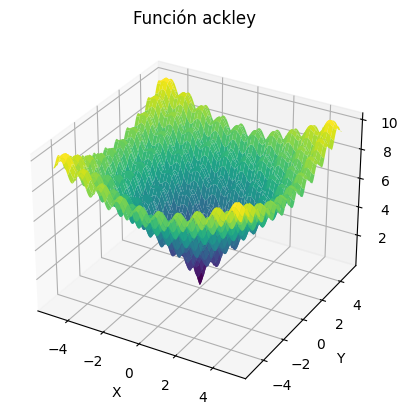

In [6]:
grafica(fun_ackley, "ackley")

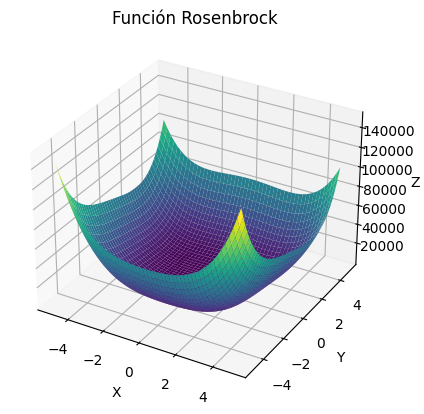

In [7]:
grafica(fun_rosenbrock, "Rosenbrock")

Recocido Simulado

In [8]:

def simulated_annealing(n, initial_solution, initial_temperature, cooling_rate, function):
    """
    Esta función implementa el algoritmo de recocido simulado para la optimización global.
    Recibe como parámetros el número de dimensiones del problema, la solución inicial, la temperatura inicial,
    la tasa de enfriamiento, la función a optimizar.
    Devuelve la mejor solución encontrada, el valor de la función para esa solución y una lista con los valores de energía durante la búsqueda.
    """
    current_solution = initial_solution
    best_solution = current_solution
    current_temperature = initial_temperature
    energy_values = []  # Lista para almacenar los valores de energía durante la búsqueda

    while function(best_solution) > 0.000001:
        for _ in range(n):
            new_solution = current_solution.copy()
            index = random.randint(0, n-1)
            new_solution[index] += random.uniform(-1, 1)

            current_energy = function(current_solution)
            new_energy = function(new_solution)

            if new_energy < current_energy:
                current_solution = new_solution
                if new_energy < function(best_solution):
                    best_solution = new_solution
            else:
                probability = math.exp((current_energy - new_energy) / current_temperature)
                if random.random() < probability:
                    current_solution = new_solution

        current_temperature *= cooling_rate
        energy_values.append(function(best_solution))  # Agregar el valor de energía a la lista

    return best_solution, function(best_solution), energy_values

Algoritmo genético

In [9]:
def initialize_population(population_size, n_dimensions, lower_bound, upper_bound):
    """
    Esta función inicializa una población para el algoritmo genético.
    Recibe como parámetros el tamaño de la población, el número de dimensiones del problema,
    los límites inferiores y superiores para los valores de las variables.
    Devuelve una lista de individuos (arreglos) que representan a la población inicializada.
    """
    population = []
    for _ in range(population_size):
        individual = [random.uniform(lower_bound, upper_bound) for _ in range(n_dimensions)]
        population.append(individual)
    return population

def evaluate_population(population, function):
    """
    Esta función evalúa la población dada utilizando la función dada.
    Recibe como parámetros la población y la función a evaluar.
    Devuelve una lista de los valores de ajuste (fitness) de cada individuo en la población.
    """
    fitness_values = []
    for individual in population:
        fitness_values.append(function(individual))
    return fitness_values

In [10]:

def select_parents(population, fitness_values, num_parents):
    """
    Esta función selecciona los padres para la siguiente generación del algoritmo genético.
    Recibe como parámetros la población, los valores de ajuste de la población y el número de padres a seleccionar.
    Devuelve una lista de los padres seleccionados.
    """
    parents = []
    sorted_indices = sorted(range(len(fitness_values)), key=lambda k: fitness_values[k])
    for i in range(num_parents):
        parents.append(population[sorted_indices[i]])
    return parents

def crossover(parents, population_size):
    """
    Esta función realiza el operador de cruce para generar descendencia en el algoritmo genético.
    Recibe como parámetros los padres seleccionados y el tamaño de la población.
    Devuelve una lista de individuos (descendencia) generados mediante el cruce.
    """
    offspring = []
    for _ in range(population_size):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        child = []
        for i in range(len(parent1)):
            if random.random() < 0.5:
                child.append(parent1[i])
            else:
                child.append(parent2[i])
        offspring.append(child)
    return offspring

def mutate(offspring, mutation_rate, lower_bound, upper_bound):
    """
    Esta función realiza el operador de mutación para la descendencia en el algoritmo genético.
    Recibe como parámetros la descendencia generada, la tasa de mutación y los límites inferiores y superiores para los valores de las variables.
    Devuelve la descendencia con mutaciones aplicadas.
    """
    for i in range(len(offspring)):
        for j in range(len(offspring[i])):
            if random.random() < mutation_rate:
                offspring[i][j] = random.uniform(lower_bound, upper_bound)
    return offspring

In [11]:
def genetic_algorithm(population_size, n_dimensions, lower_bound, upper_bound, num_parents, mutation_rate, num_generations, function):
    """
    Esta función implementa el algoritmo genético para la optimización de funciones.
    Recibe como parámetros el tamaño de la población, el número de dimensiones del problema,
    los límites inferiores y superiores para los valores de las variables, el número de padres a seleccionar,
    la tasa de mutación, el número de generaciones y la función a optimizar.
    Devuelve el mejor individuo encontrado, el valor de ajuste correspondiente y una lista de los mejores valores de ajuste por generación.
    """
    population = initialize_population(population_size, n_dimensions, lower_bound, upper_bound)
    best_fitness_values = []  # Lista para almacenar los mejores valores de ajuste por generación

    for _ in range(num_generations):
        fitness_values = evaluate_population(population, function)
        best_fitness_values.append(min(fitness_values))  # Agregar el mejor valor de ajuste a la lista

        parents = select_parents(population, fitness_values, num_parents)
        offspring = crossover(parents, population_size)
        offspring = mutate(offspring, mutation_rate, lower_bound, upper_bound)

        population = offspring

    best_solution = population[fitness_values.index(min(fitness_values))]
    return best_solution, min(fitness_values), best_fitness_values

In [21]:
def algoritmoHibrido(population_size, initial_temperature, cooling_rate, function, funName):
    #Configuración del problema:
    n_dimensions = 10
    lower_bound = -32
    upper_bound = 32

    #Parametros génetico
    num_parents = 10
    mutation_rate = 0.01
    num_generations = 10000
    
    semillas = [2,3,5,7,11,13,17,19,23,29]
    
    mejorValorGA = list()
    fitValuesGA = list()
    mejorValorSA = list()
    fitValuesSA = list()
    iterSA = list()
    
    
    
    for semilla in semillas:
        random.seed(semilla)
        # Ejecución del algoritmo genético
        best_solution, min_value, best_fitness_values = genetic_algorithm(population_size, n_dimensions, lower_bound, upper_bound, num_parents, mutation_rate, num_generations, function)
        mejorValorGA.append(min_value)
        fitValuesGA.append(best_fitness_values)
        
        # Ejecución del recocido simulado
        best_solution, min_value, energy_values, num_iter = simulated_annealing(n_dimensions, best_solution, initial_temperature, cooling_rate, function)
        mejorValorSA.append(min_value)
        fitValuesSA.append(energy_values)
        iterSA.append(num_iter)
        
        
    #Resultados algoritmo génetico
    mediaGA = np.mean(mejorValorGA)
    desviacion_estandarGA = np.std(mejorValorGA)
    valorMinimiGA = min(mejorValorGA)
    mejorFitnessGA = fitValuesGA[mejorValorGA.index(valorMinimiGA)]
    
    print("Algoritmo génetico")
    print(f'En la iteración {mejorValorGA.index(min(mejorValorGA))} se encontró el valor {min(mejorValorGA)}')
    print(f'El valor de la media de los mejores valores con esta configuración fue {mediaGA} con una desviación estandar de {desviacion_estandarGA}')

    #Resultados recocido simulado
    mediaSA = np.mean(mejorValorSA)
    desviacion_estandarSA = np.std(mejorValorSA)
    valorMinimiSA = min(mejorValorSA)
    mejorFitnessSA = fitValuesSA[mejorValorSA.index(min(mejorValorSA))]
    mediaIter = np.mean(iterSA)
    deIter = np.std(iterSA)
    
    print("Búsqueda local (Recocido Simulado)")
    print(f'En la iteración {mejorValorSA.index(min(mejorValorSA))} se encontró el valor {valorMinimiSA}')
    print(f'El valor de la media de los mejores valores con esta configuración fue {mediaSA} con una desviación estandar de {desviacion_estandarSA}')
    print(f'En la iteración {iterSA.index(min(iterSA))} fue la que necesito menos iteraciones con un número de {min(iterSA)} para encontrar el valor {mejorValorSA[iterSA.index(min(iterSA))]}')
    print(f'La media de iteraciones para el recocido simulado es de {mediaIter} con una desviación estándar de {deIter}')

    #Gráfica
    # Tamaño de la figura
    fig = plt.figure(figsize=(15, 5))

    # Título de la figura
    fig.suptitle('Mejores valores en la optimización de la función de '+funName, fontsize=16, fontweight='bold')


    # Gráfica 1
    ax1 = fig.add_subplot(121)  # 1 fila, 2 columnas, 1er subplot
    ax1.plot(mejorFitnessGA, color='blue', linewidth=2)
    ax1.set_xlabel('Generaciones')
    ax1.set_ylabel('Valor de ajuste')
    ax1.set_title('Algoritmo genético - Valores de ajuste')
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Gráfica 2
    ax2 = fig.add_subplot(122)  # 1 fila, 2 columnas, 2do subplot
    ax2.plot(mejorFitnessSA, color='green', linewidth=2)
    ax2.set_xlabel('Iteraciones')
    ax2.set_ylabel('Valor de energía')
    ax2.set_title('Recocido simulado - Valores de energía')
    ax2.grid(True, linestyle='--', alpha=0.5)

    # Ajustar espaciado entre subplots
    plt.tight_layout()

    # Mostrar gráficas
    plt.show()


<h2>Analisís Anova</h2>

In [14]:
configuraciones = [[60,0.85,100],[60,0.85,150],[60,0.95,100],[60,0.95,150],[100,0.85,100],[100,0.85,150],[100,0.95,100],[100,0.95,150],[140,0.85,100],[140,0.85,150],[140,0.95,100],[140,0.95,150]]


<h2>Función Ackley</h2>

Configuración 1

Parametros de la configuración 1: 
Tamaño de población: 100 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 2 se encontró el valor 0.011813959535377894
El valor de la media de los mejores valores con esta configuración fue 0.025071348716486686 con una desviación estandar de 0.007627996005879244
Búsqueda local (Recocido Simulado)
En la iteración 9 se encontró el valor 7.198783088302463e-06
El valor de la media de los mejores valores con esta configuración fue 8.717604193098083e-06 con una desviación estandar de 8.585539051600515e-07
En la iteración 2 fue la que necesito menos iteraciones con un número de 314548 para encontrar el valor 9.017454250415113e-06
La media de iteraciones para el recocido simulado es de 491380.4 con una desviación estándar de 92530.92289089091


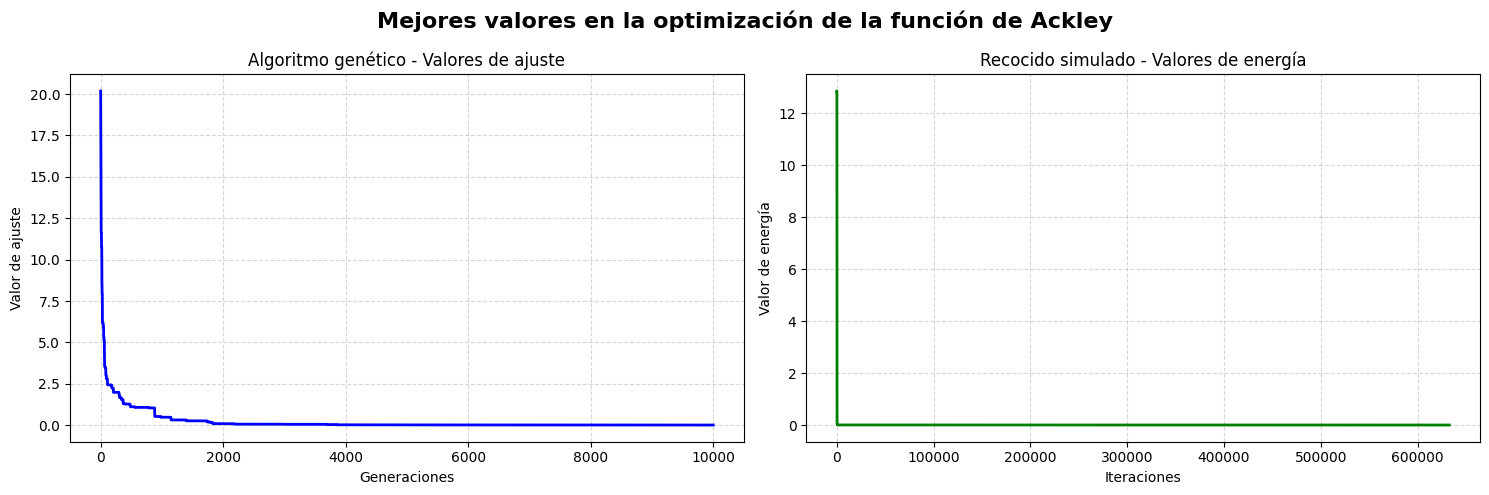

In [82]:
tempInicial = configuraciones[0][0]
ratioEnfriamiento = configuraciones[0][1]
tamPoblacion = configuraciones[0][2]

print(f'Parametros de la configuración {1}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 2

Parametros de la configuración 2: 
Tamaño de población: 150 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 6 se encontró el valor 0.00769675822219229
El valor de la media de los mejores valores con esta configuración fue 0.010703542690292256 con una desviación estandar de 0.0021952516341627814
Búsqueda local (Recocido Simulado)
En la iteración 8 se encontró el valor 5.976868540091829e-06
El valor de la media de los mejores valores con esta configuración fue 8.542363781049999e-06 con una desviación estandar de 1.2231136284197314e-06
En la iteración 5 fue la que necesito menos iteraciones con un número de 296434 para encontrar el valor 9.960119431884351e-06
La media de iteraciones para el recocido simulado es de 550321.6 con una desviación estándar de 280912.0432620147


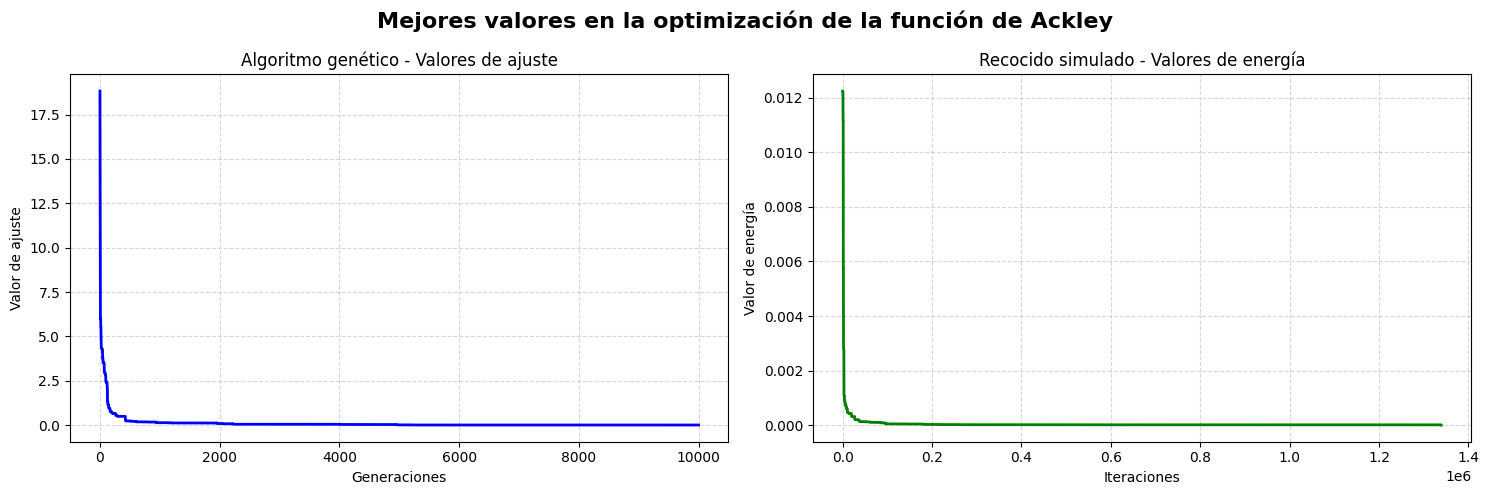

In [83]:
tempInicial = configuraciones[1][0]
ratioEnfriamiento = configuraciones[1][1]
tamPoblacion = configuraciones[1][2]

print(f'Parametros de la configuración {2}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 3

Parametros de la configuración 3: 
Tamaño de población: 100 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 2 se encontró el valor 0.011813959535377894
El valor de la media de los mejores valores con esta configuración fue 0.025071348716486686 con una desviación estandar de 0.007627996005879244
Búsqueda local (Recocido Simulado)
En la iteración 9 se encontró el valor 5.454241705837859e-06
El valor de la media de los mejores valores con esta configuración fue 8.991620232468023e-06 con una desviación estandar de 1.2780082386355927e-06
En la iteración 9 fue la que necesito menos iteraciones con un número de 231061 para encontrar el valor 5.454241705837859e-06
La media de iteraciones para el recocido simulado es de 462031.0 con una desviación estándar de 137819.9322238986


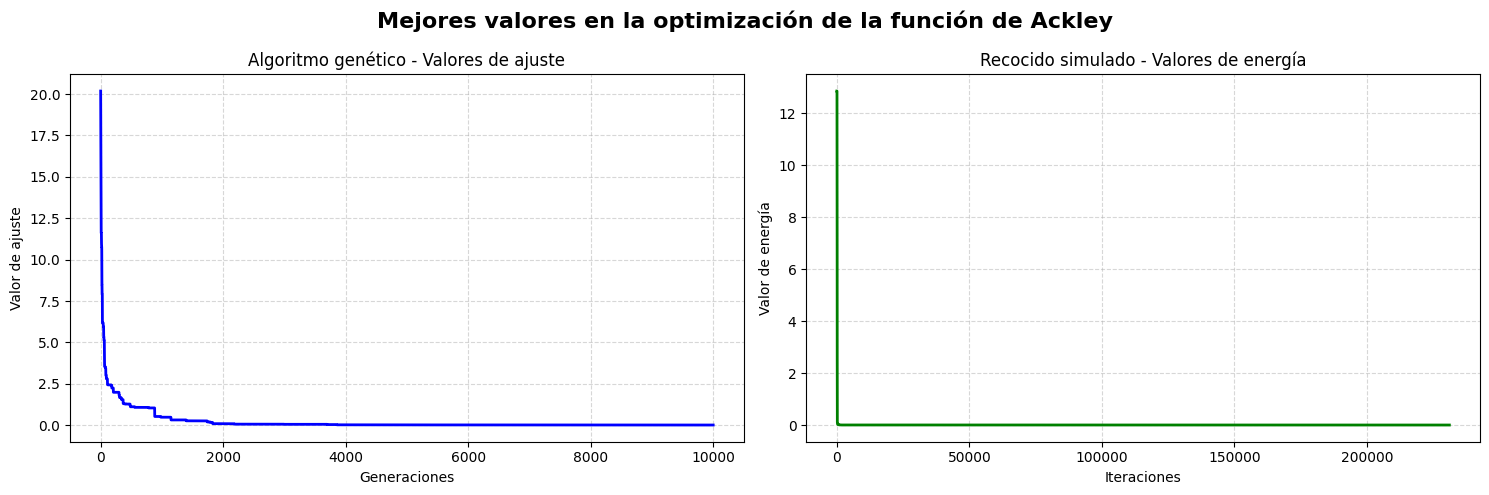

In [84]:
tempInicial = configuraciones[2][0]
ratioEnfriamiento = configuraciones[2][1]
tamPoblacion = configuraciones[2][2]

print(f'Parametros de la configuración {3}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 4

Parametros de la configuración 4: 
Tamaño de población: 150 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 6 se encontró el valor 0.00769675822219229
El valor de la media de los mejores valores con esta configuración fue 0.010703542690292256 con una desviación estandar de 0.0021952516341627814
Búsqueda local (Recocido Simulado)
En la iteración 1 se encontró el valor 7.0013193185225475e-06
El valor de la media de los mejores valores con esta configuración fue 8.683583719903964e-06 con una desviación estandar de 9.903397416848172e-07
En la iteración 9 fue la que necesito menos iteraciones con un número de 263138 para encontrar el valor 9.838510646620335e-06
La media de iteraciones para el recocido simulado es de 485479.1 con una desviación estándar de 153741.7846042188


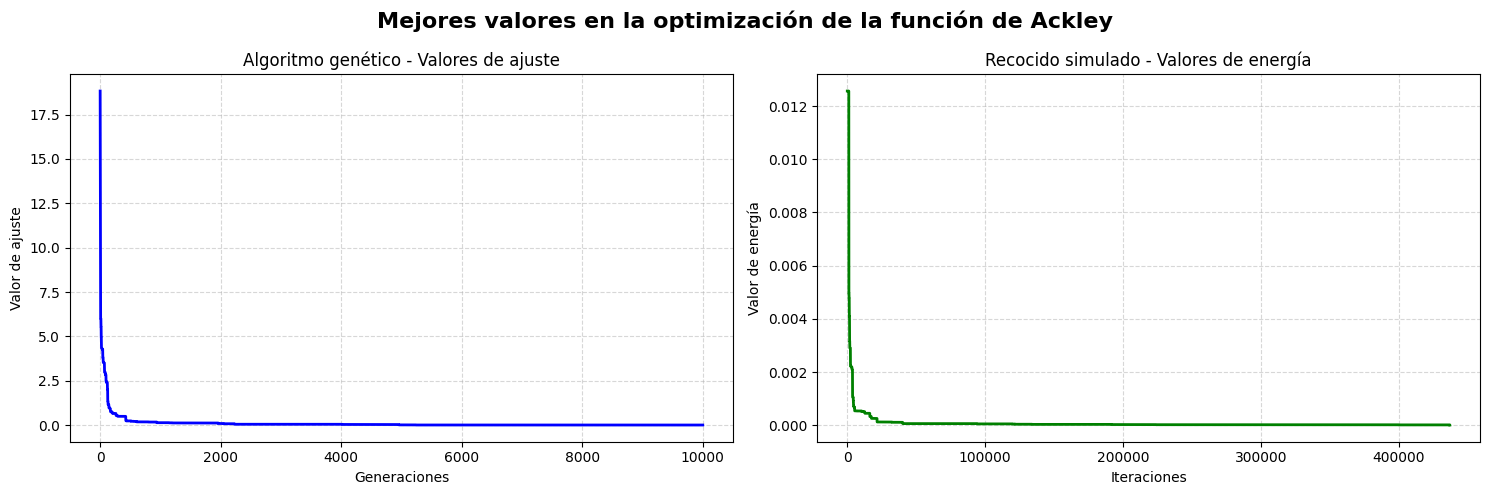

In [85]:
tempInicial = configuraciones[3][0]
ratioEnfriamiento = configuraciones[3][1]
tamPoblacion = configuraciones[3][2]

print(f'Parametros de la configuración {4}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 5

Parametros de la configuración 5: 
Tamaño de población: 100 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 2 se encontró el valor 0.011813959535377894
El valor de la media de los mejores valores con esta configuración fue 0.025071348716486686 con una desviación estandar de 0.007627996005879244
Búsqueda local (Recocido Simulado)
En la iteración 0 se encontró el valor 5.566561345649035e-06
El valor de la media de los mejores valores con esta configuración fue 8.995710644743582e-06 con una desviación estandar de 1.2439359487645296e-06
En la iteración 1 fue la que necesito menos iteraciones con un número de 164432 para encontrar el valor 9.259401732908401e-06
La media de iteraciones para el recocido simulado es de 465563.4 con una desviación estándar de 176335.71807957682


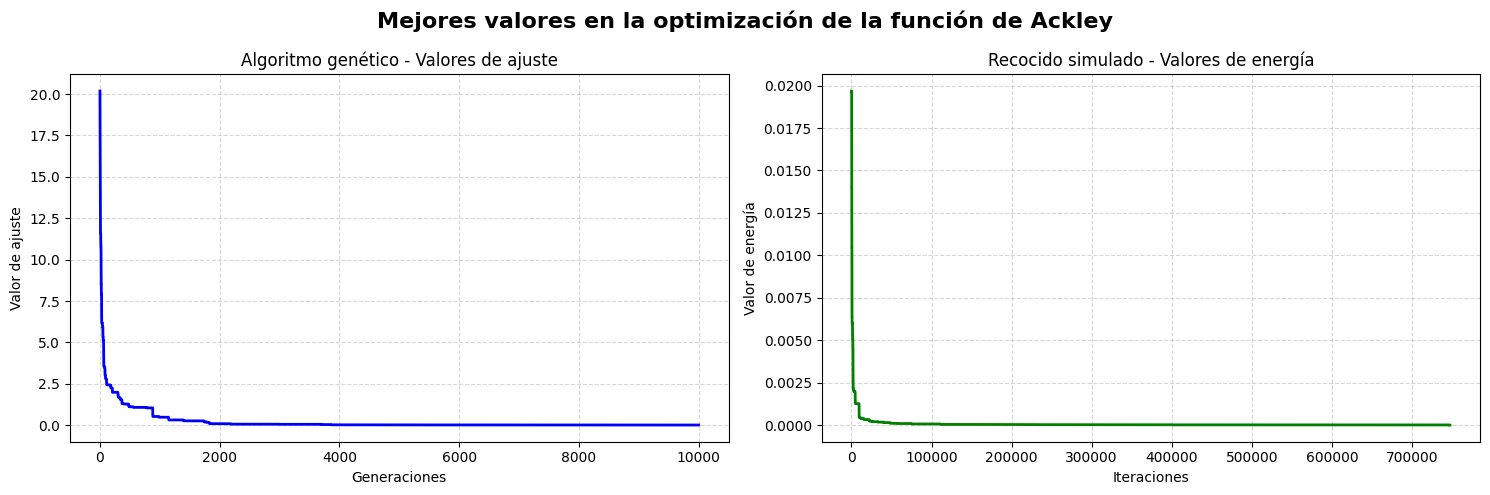

In [86]:
tempInicial = configuraciones[4][0]
ratioEnfriamiento = configuraciones[4][1]
tamPoblacion = configuraciones[4][2]

print(f'Parametros de la configuración {5}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 6

Parametros de la configuración 6: 
Tamaño de población: 150 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 6 se encontró el valor 0.00769675822219229
El valor de la media de los mejores valores con esta configuración fue 0.010703542690292256 con una desviación estandar de 0.0021952516341627814
Búsqueda local (Recocido Simulado)
En la iteración 8 se encontró el valor 6.600713224447219e-06
El valor de la media de los mejores valores con esta configuración fue 8.461785034885594e-06 con una desviación estandar de 1.1559343798034644e-06
En la iteración 2 fue la que necesito menos iteraciones con un número de 240309 para encontrar el valor 9.404172044202852e-06
La media de iteraciones para el recocido simulado es de 405743.5 con una desviación estándar de 84246.37895274787


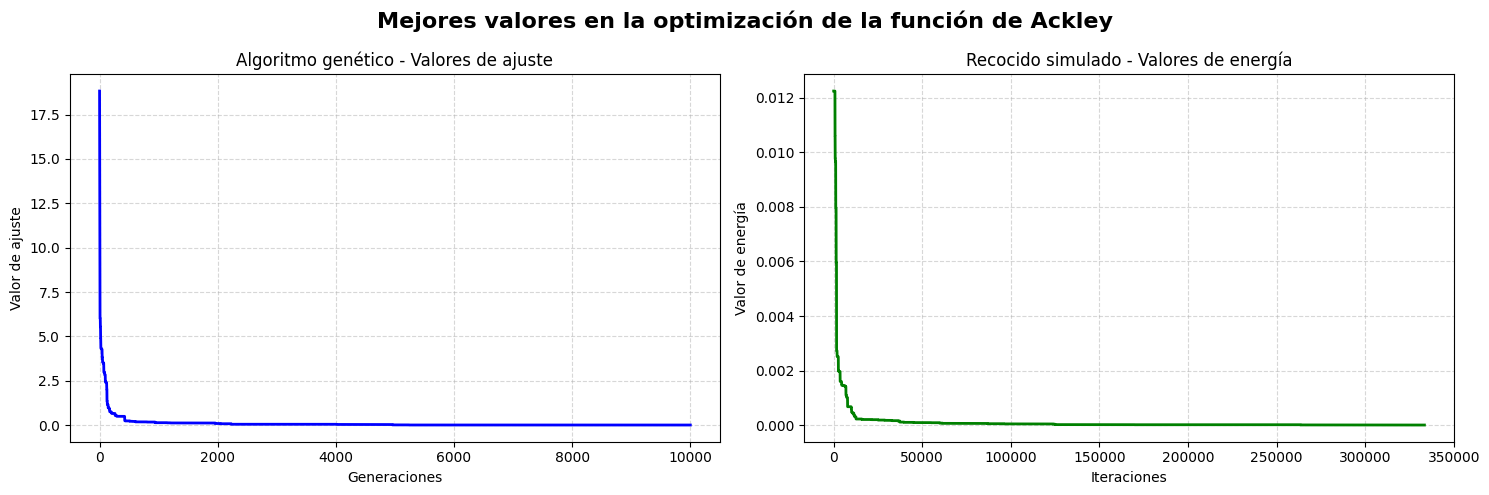

In [87]:
tempInicial = configuraciones[5][0]
ratioEnfriamiento = configuraciones[5][1]
tamPoblacion = configuraciones[5][2]

print(f'Parametros de la configuración {6}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 7

Parametros de la configuración 7: 
Tamaño de población: 100 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 2 se encontró el valor 0.011813959535377894
El valor de la media de los mejores valores con esta configuración fue 0.025071348716486686 con una desviación estandar de 0.007627996005879244
Búsqueda local (Recocido Simulado)
En la iteración 3 se encontró el valor 3.498713276872678e-06
El valor de la media de los mejores valores con esta configuración fue 7.5823782162309785e-06 con una desviación estandar de 2.0766939138459142e-06
En la iteración 5 fue la que necesito menos iteraciones con un número de 358335 para encontrar el valor 9.439760724649915e-06
La media de iteraciones para el recocido simulado es de 473980.1 con una desviación estándar de 115720.93212159156


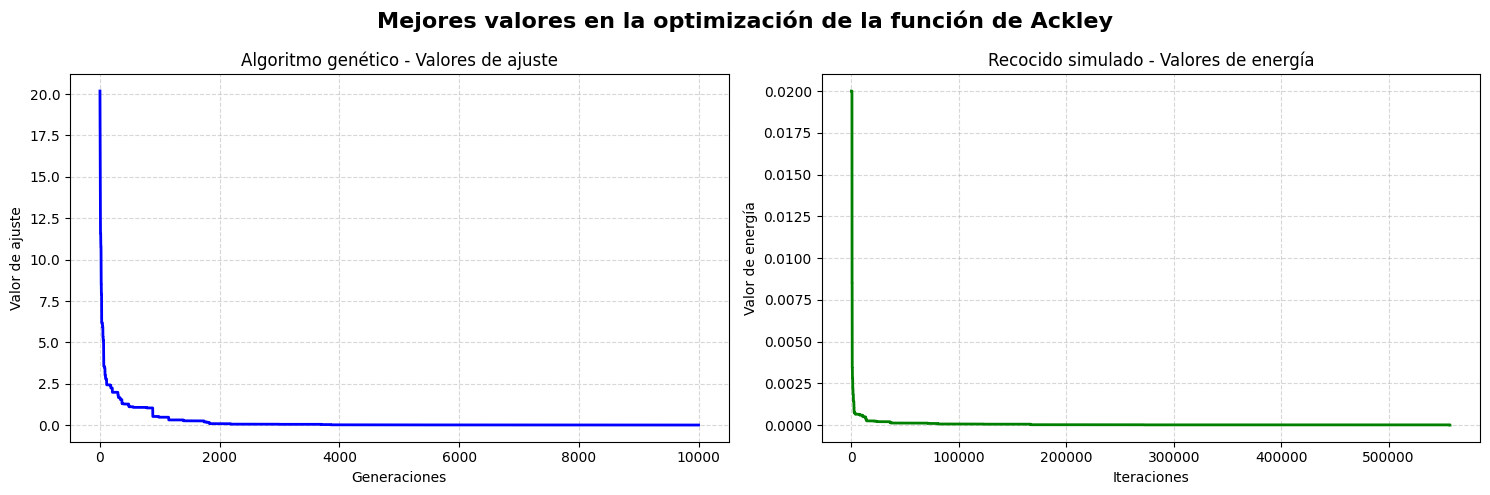

In [88]:
tempInicial = configuraciones[6][0]
ratioEnfriamiento = configuraciones[6][1]
tamPoblacion = configuraciones[6][2]

print(f'Parametros de la configuración {7}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 8

Parametros de la configuración 8: 
Tamaño de población: 150 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 6 se encontró el valor 0.00769675822219229
El valor de la media de los mejores valores con esta configuración fue 0.010703542690292256 con una desviación estandar de 0.0021952516341627814
Búsqueda local (Recocido Simulado)
En la iteración 2 se encontró el valor 5.2037117268532995e-06
El valor de la media de los mejores valores con esta configuración fue 7.751796900823393e-06 con una desviación estandar de 1.3379030413686936e-06
En la iteración 3 fue la que necesito menos iteraciones con un número de 252527 para encontrar el valor 9.650450497833418e-06
La media de iteraciones para el recocido simulado es de 457000.2 con una desviación estándar de 113069.06540057718


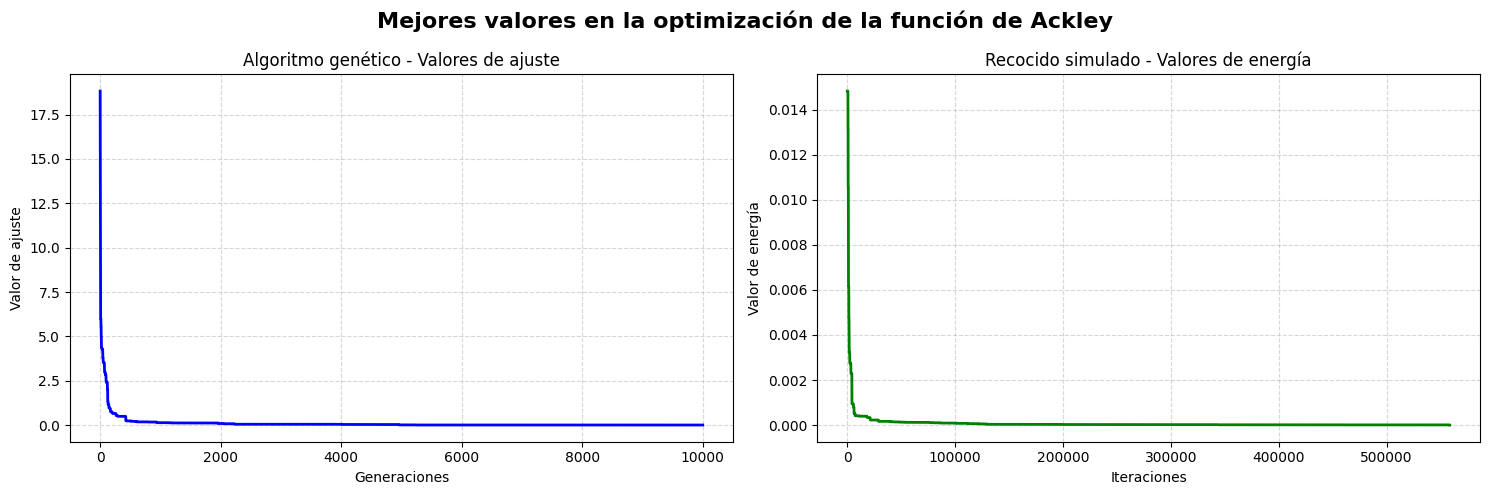

In [90]:
tempInicial = configuraciones[7][0]
ratioEnfriamiento = configuraciones[7][1]
tamPoblacion = configuraciones[7][2]

print(f'Parametros de la configuración {8}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 9

Parametros de la configuración 9: 
Tamaño de población: 100 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 2 se encontró el valor 0.011813959535377894
El valor de la media de los mejores valores con esta configuración fue 0.025071348716486686 con una desviación estandar de 0.007627996005879244
Búsqueda local (Recocido Simulado)
En la iteración 9 se encontró el valor 5.423142422689153e-06
El valor de la media de los mejores valores con esta configuración fue 8.640059593378879e-06 con una desviación estandar de 1.3635885654097233e-06
En la iteración 4 fue la que necesito menos iteraciones con un número de 257768 para encontrar el valor 9.855260682645195e-06
La media de iteraciones para el recocido simulado es de 526302.4 con una desviación estándar de 139516.02337022082


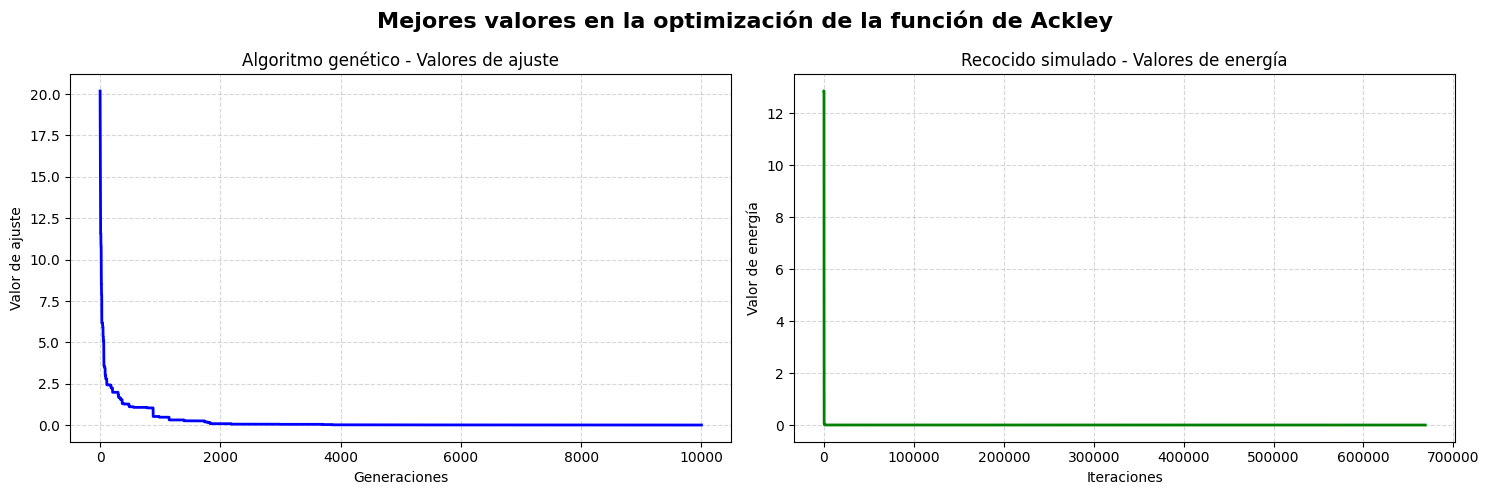

In [91]:
tempInicial = configuraciones[8][0]
ratioEnfriamiento = configuraciones[8][1]
tamPoblacion = configuraciones[8][2]

print(f'Parametros de la configuración {9}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 10

Parametros de la configuración 10: 
Tamaño de población: 150 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 6 se encontró el valor 0.00769675822219229
El valor de la media de los mejores valores con esta configuración fue 0.010703542690292256 con una desviación estandar de 0.0021952516341627814
Búsqueda local (Recocido Simulado)
En la iteración 3 se encontró el valor 6.411949005968864e-06
El valor de la media de los mejores valores con esta configuración fue 8.26218873877238e-06 con una desviación estandar de 1.0650948342222575e-06
En la iteración 8 fue la que necesito menos iteraciones con un número de 327944 para encontrar el valor 7.626699585205898e-06
La media de iteraciones para el recocido simulado es de 484696.1 con una desviación estándar de 169693.72792855368


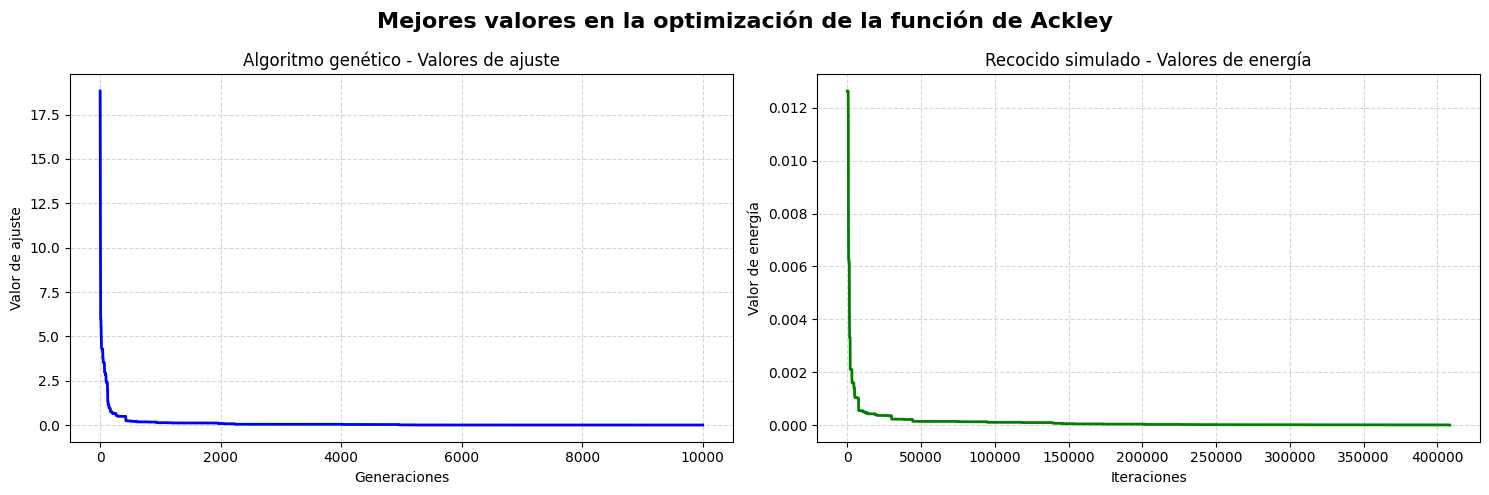

In [17]:
tempInicial = configuraciones[9][0]
ratioEnfriamiento = configuraciones[9][1]
tamPoblacion = configuraciones[9][2]

print(f'Parametros de la configuración {10}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 11

Parametros de la configuración 11: 
Tamaño de población: 100 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 2 se encontró el valor 0.011813959535377894
El valor de la media de los mejores valores con esta configuración fue 0.025071348716486686 con una desviación estandar de 0.007627996005879244
Búsqueda local (Recocido Simulado)
En la iteración 7 se encontró el valor 6.138152447210388e-06
El valor de la media de los mejores valores con esta configuración fue 8.615275613355067e-06 con una desviación estandar de 1.2039806189512015e-06
En la iteración 9 fue la que necesito menos iteraciones con un número de 311053 para encontrar el valor 8.689834779307404e-06
La media de iteraciones para el recocido simulado es de 470523.8 con una desviación estándar de 79631.67777310737


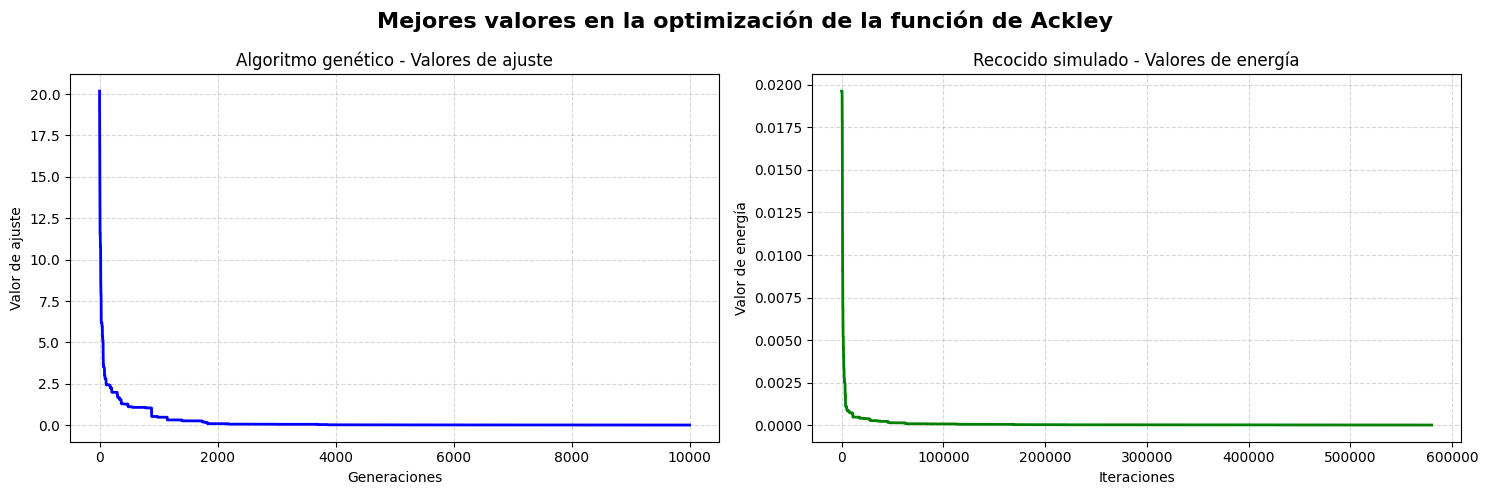

In [18]:
tempInicial = configuraciones[10][0]
ratioEnfriamiento = configuraciones[10][1]
tamPoblacion = configuraciones[10][2]

print(f'Parametros de la configuración {11}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

Configuración 12

Parametros de la configuración 12: 
Tamaño de población: 150 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 6 se encontró el valor 0.00769675822219229
El valor de la media de los mejores valores con esta configuración fue 0.010703542690292256 con una desviación estandar de 0.0021952516341627814
Búsqueda local (Recocido Simulado)
En la iteración 5 se encontró el valor 7.094871044888151e-06
El valor de la media de los mejores valores con esta configuración fue 9.175298076247173e-06 con una desviación estandar de 8.692366581022185e-07
En la iteración 6 fue la que necesito menos iteraciones con un número de 204532 para encontrar el valor 9.762161799375946e-06
La media de iteraciones para el recocido simulado es de 495372.4 con una desviación estándar de 233705.45725258536


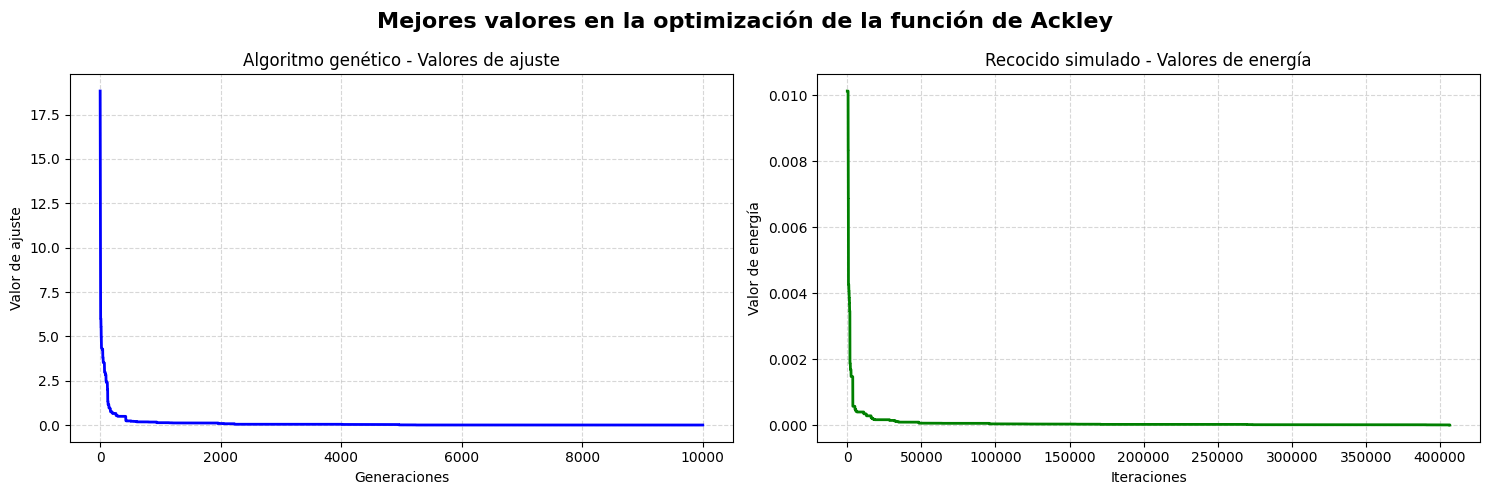

In [19]:
tempInicial = configuraciones[11][0]
ratioEnfriamiento = configuraciones[11][1]
tamPoblacion = configuraciones[11][2]

print(f'Parametros de la configuración {12}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_ackley, "Ackley")

<h2>Función de Rosenbrock</h2>

Configuración 1


Parametros de la configuración 1: 
Tamaño de población: 100 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 9 se encontró el valor 0.004848479820303897
El valor de la media de los mejores valores con esta configuración fue 0.00845347629995965 con una desviación estandar de 0.002547101704109281
Búsqueda local (Recocido Simulado)
En la iteración 6 se encontró el valor 4.894035730007573e-06
El valor de la media de los mejores valores con esta configuración fue 8.563936491601254e-06 con una desviación estandar de 1.4676218504175623e-06
En la iteración 9 fue la que necesito menos iteraciones con un número de 354658 para encontrar el valor 9.91703847619263e-06
La media de iteraciones para el recocido simulado es de 559462.3 con una desviación estándar de 136041.68731168399


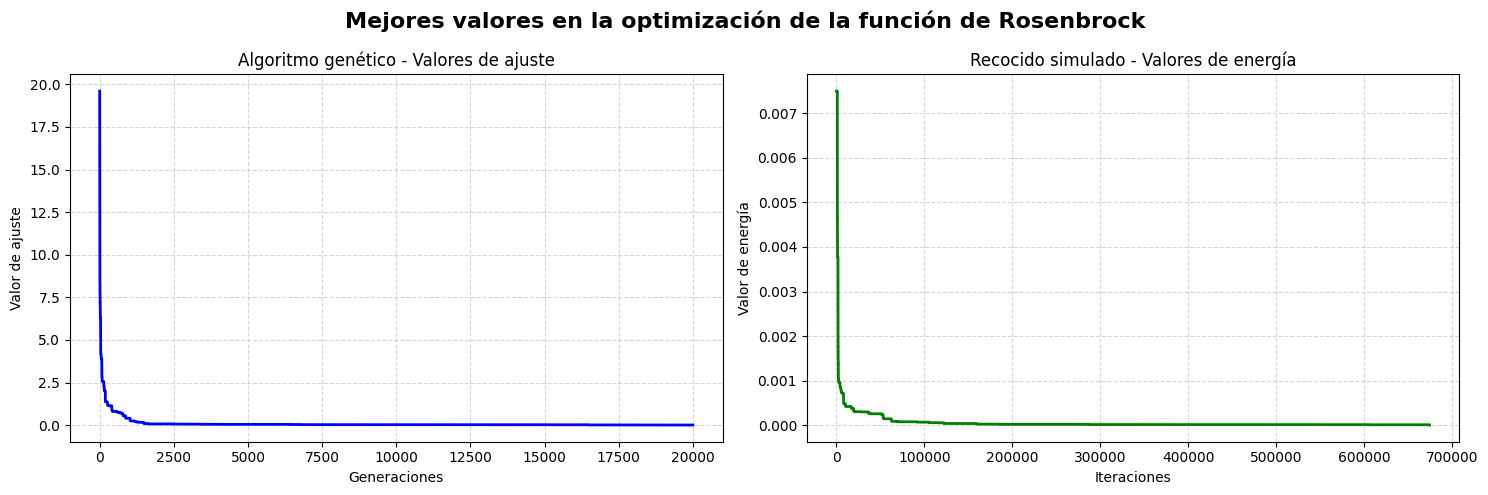

In [22]:
tempInicial = configuraciones[0][0]
ratioEnfriamiento = configuraciones[0][1]
tamPoblacion = configuraciones[0][2]

print(f'Parametros de la configuración {1}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 2

Parametros de la configuración 2: 
Tamaño de población: 150 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 4 se encontró el valor 0.003469641511874233
El valor de la media de los mejores valores con esta configuración fue 0.005680115437666178 con una desviación estandar de 0.0015743743906080035
Búsqueda local (Recocido Simulado)
En la iteración 2 se encontró el valor 5.641343332474236e-06
El valor de la media de los mejores valores con esta configuración fue 8.37014079495546e-06 con una desviación estandar de 1.184858057381278e-06
En la iteración 5 fue la que necesito menos iteraciones con un número de 313640 para encontrar el valor 7.774431420859429e-06
La media de iteraciones para el recocido simulado es de 568704.8 con una desviación estándar de 125845.41938012683


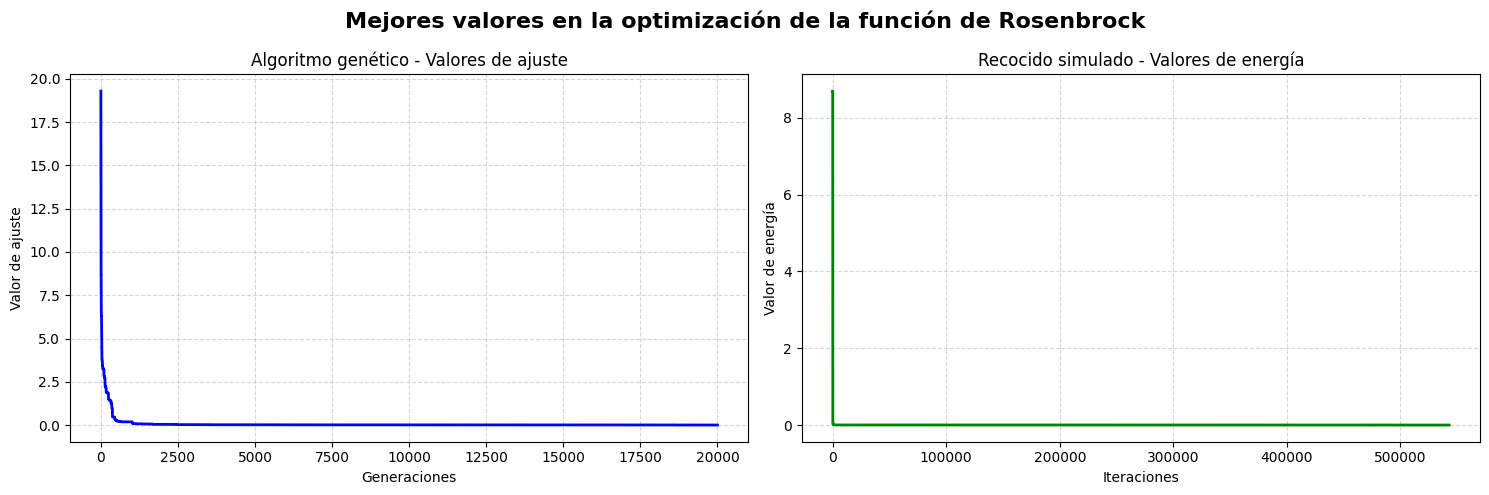

In [24]:
tempInicial = configuraciones[1][0]
ratioEnfriamiento = configuraciones[1][1]
tamPoblacion = configuraciones[1][2]

print(f'Parametros de la configuración {2}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 3

Parametros de la configuración 3: 
Tamaño de población: 100 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 9 se encontró el valor 0.004848479820303897
El valor de la media de los mejores valores con esta configuración fue 0.00845347629995965 con una desviación estandar de 0.002547101704109281
Búsqueda local (Recocido Simulado)
En la iteración 4 se encontró el valor 7.4740040543197495e-06
El valor de la media de los mejores valores con esta configuración fue 9.180547821774353e-06 con una desviación estandar de 7.93927877983642e-07
En la iteración 7 fue la que necesito menos iteraciones con un número de 291268 para encontrar el valor 9.795138091295286e-06
La media de iteraciones para el recocido simulado es de 546959.4 con una desviación estándar de 166423.44202797872


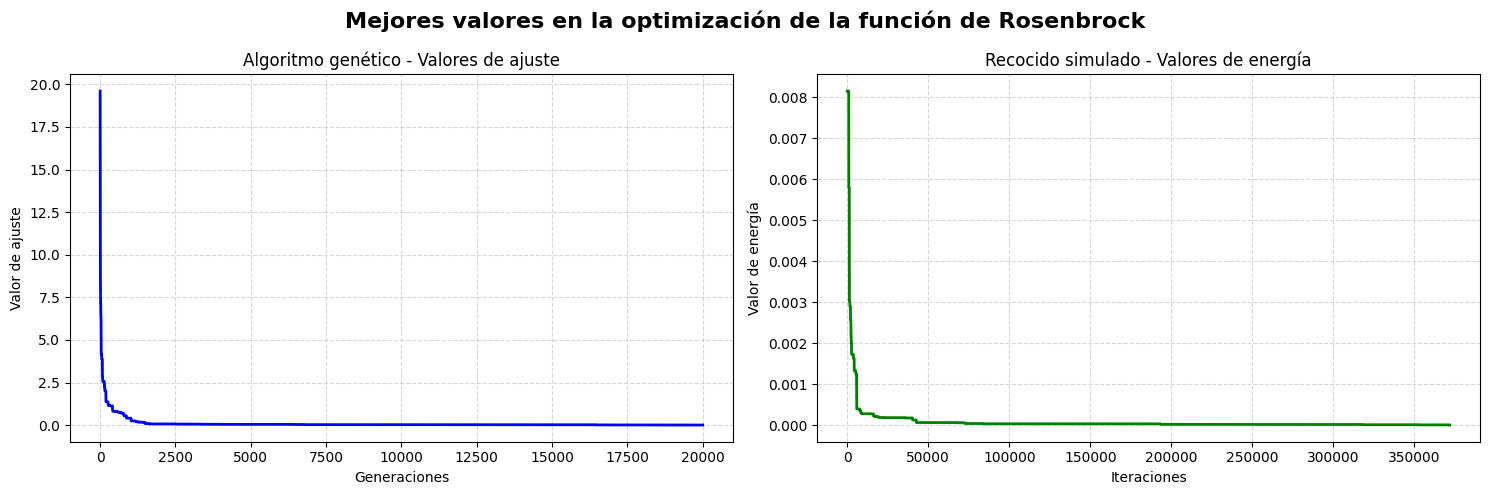

In [25]:
tempInicial = configuraciones[2][0]
ratioEnfriamiento = configuraciones[2][1]
tamPoblacion = configuraciones[2][2]

print(f'Parametros de la configuración {3}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 4

Parametros de la configuración 4: 
Tamaño de población: 150 || Temperatura Inicial: 60 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 4 se encontró el valor 0.003469641511874233
El valor de la media de los mejores valores con esta configuración fue 0.005680115437666178 con una desviación estandar de 0.0015743743906080035
Búsqueda local (Recocido Simulado)
En la iteración 2 se encontró el valor 6.777090423515375e-06
El valor de la media de los mejores valores con esta configuración fue 9.069994157417937e-06 con una desviación estandar de 1.0495599979873782e-06
En la iteración 0 fue la que necesito menos iteraciones con un número de 288333 para encontrar el valor 9.970840452400154e-06
La media de iteraciones para el recocido simulado es de 502629.3 con una desviación estándar de 138784.5501841253


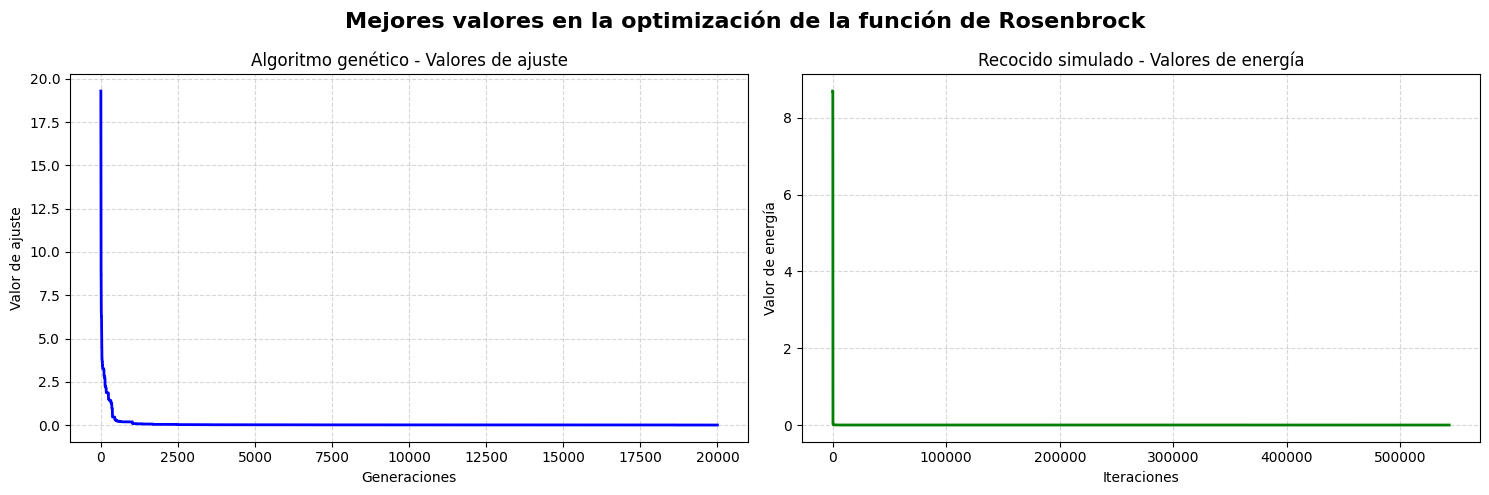

In [26]:
tempInicial = configuraciones[3][0]
ratioEnfriamiento = configuraciones[3][1]
tamPoblacion = configuraciones[3][2]

print(f'Parametros de la configuración {4}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 5

Parametros de la configuración 5: 
Tamaño de población: 100 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 9 se encontró el valor 0.004848479820303897
El valor de la media de los mejores valores con esta configuración fue 0.00845347629995965 con una desviación estandar de 0.002547101704109281
Búsqueda local (Recocido Simulado)
En la iteración 6 se encontró el valor 6.837575096785287e-06
El valor de la media de los mejores valores con esta configuración fue 8.386691818618174e-06 con una desviación estandar de 1.0002796745037698e-06
En la iteración 5 fue la que necesito menos iteraciones con un número de 370725 para encontrar el valor 8.477297609221779e-06
La media de iteraciones para el recocido simulado es de 505227.5 con una desviación estándar de 117912.92477777829


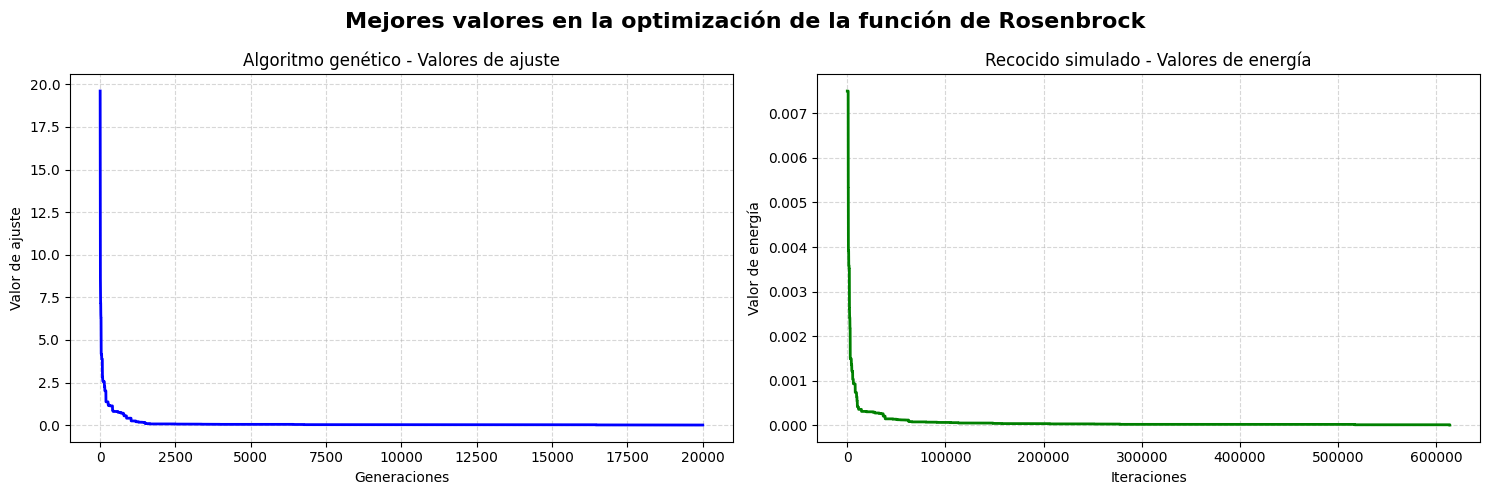

In [27]:
tempInicial = configuraciones[4][0]
ratioEnfriamiento = configuraciones[4][1]
tamPoblacion = configuraciones[4][2]

print(f'Parametros de la configuración {5}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 6

Parametros de la configuración 6: 
Tamaño de población: 150 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 4 se encontró el valor 0.003469641511874233
El valor de la media de los mejores valores con esta configuración fue 0.005680115437666178 con una desviación estandar de 0.0015743743906080035
Búsqueda local (Recocido Simulado)
En la iteración 6 se encontró el valor 6.6115343995143405e-06
El valor de la media de los mejores valores con esta configuración fue 8.917816043041427e-06 con una desviación estandar de 9.68293094707913e-07
En la iteración 9 fue la que necesito menos iteraciones con un número de 363172 para encontrar el valor 9.617749974655254e-06
La media de iteraciones para el recocido simulado es de 472788.1 con una desviación estándar de 102595.80208025083


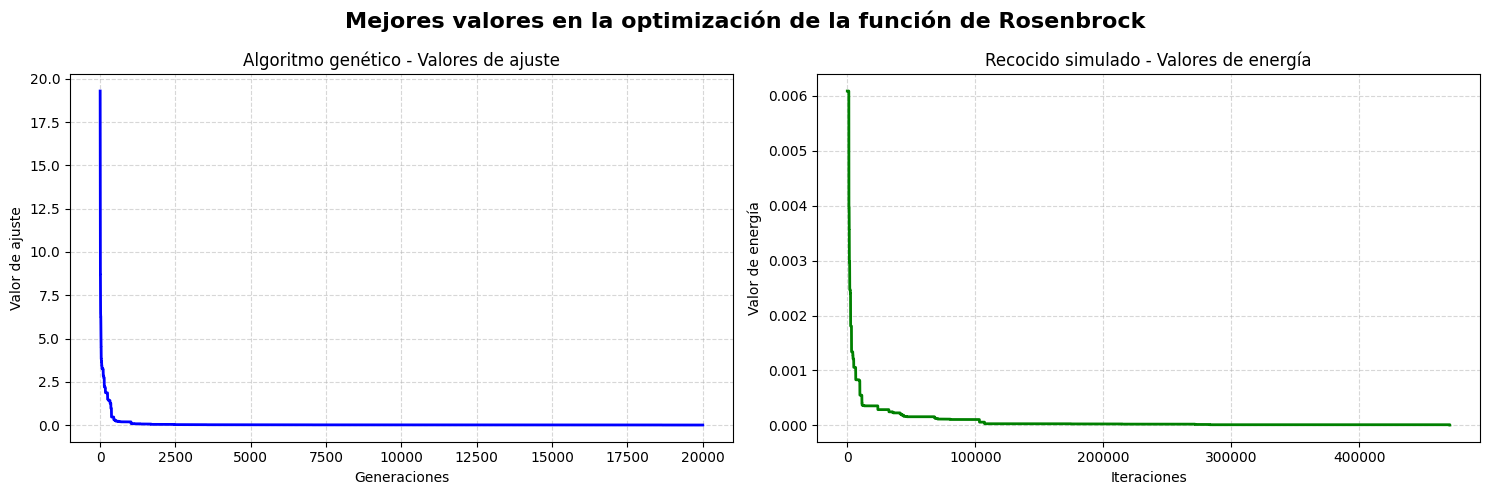

In [28]:
tempInicial = configuraciones[5][0]
ratioEnfriamiento = configuraciones[5][1]
tamPoblacion = configuraciones[5][2]

print(f'Parametros de la configuración {6}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 7

Parametros de la configuración 7: 
Tamaño de población: 100 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 9 se encontró el valor 0.004848479820303897
El valor de la media de los mejores valores con esta configuración fue 0.00845347629995965 con una desviación estandar de 0.002547101704109281
Búsqueda local (Recocido Simulado)
En la iteración 9 se encontró el valor 7.202378249804298e-06
El valor de la media de los mejores valores con esta configuración fue 8.898342640595303e-06 con una desviación estandar de 9.020231102872934e-07
En la iteración 2 fue la que necesito menos iteraciones con un número de 236988 para encontrar el valor 8.779227716804172e-06
La media de iteraciones para el recocido simulado es de 489730.7 con una desviación estándar de 162676.16606931083


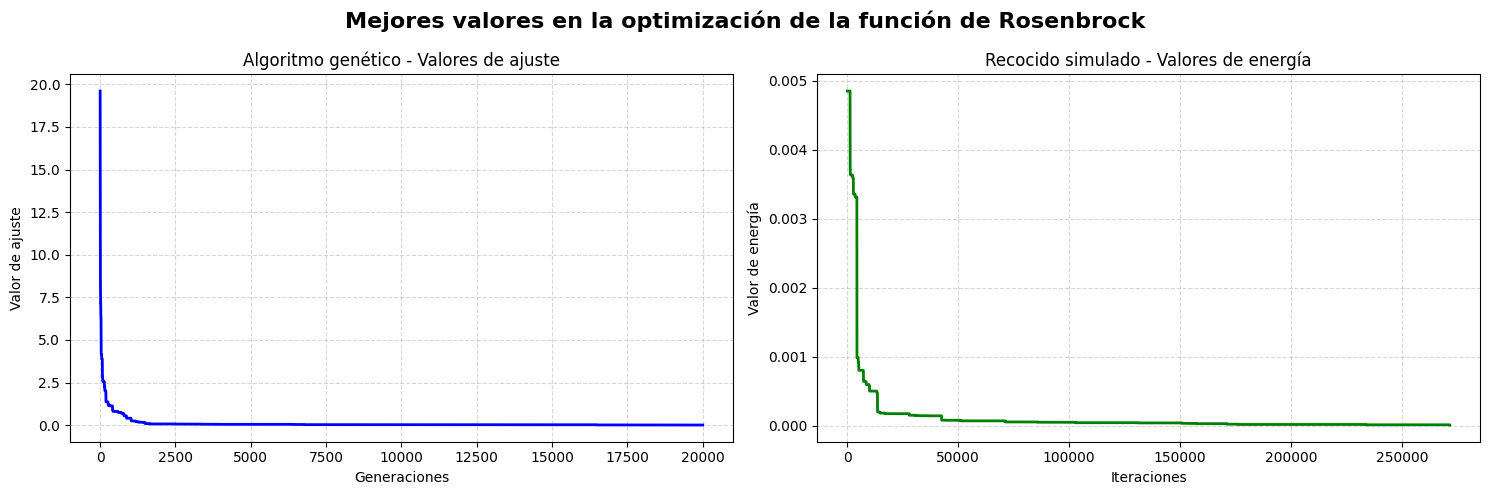

In [29]:
tempInicial = configuraciones[6][0]
ratioEnfriamiento = configuraciones[6][1]
tamPoblacion = configuraciones[6][2]

print(f'Parametros de la configuración {7}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 8

Parametros de la configuración 8: 
Tamaño de población: 150 || Temperatura Inicial: 100 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 4 se encontró el valor 0.003469641511874233
El valor de la media de los mejores valores con esta configuración fue 0.005680115437666178 con una desviación estandar de 0.0015743743906080035
Búsqueda local (Recocido Simulado)
En la iteración 9 se encontró el valor 6.716582153121209e-06
El valor de la media de los mejores valores con esta configuración fue 8.362040101861368e-06 con una desviación estandar de 1.0438146870739459e-06
En la iteración 9 fue la que necesito menos iteraciones con un número de 372132 para encontrar el valor 6.716582153121209e-06
La media de iteraciones para el recocido simulado es de 553433.6 con una desviación estándar de 136174.7425370799


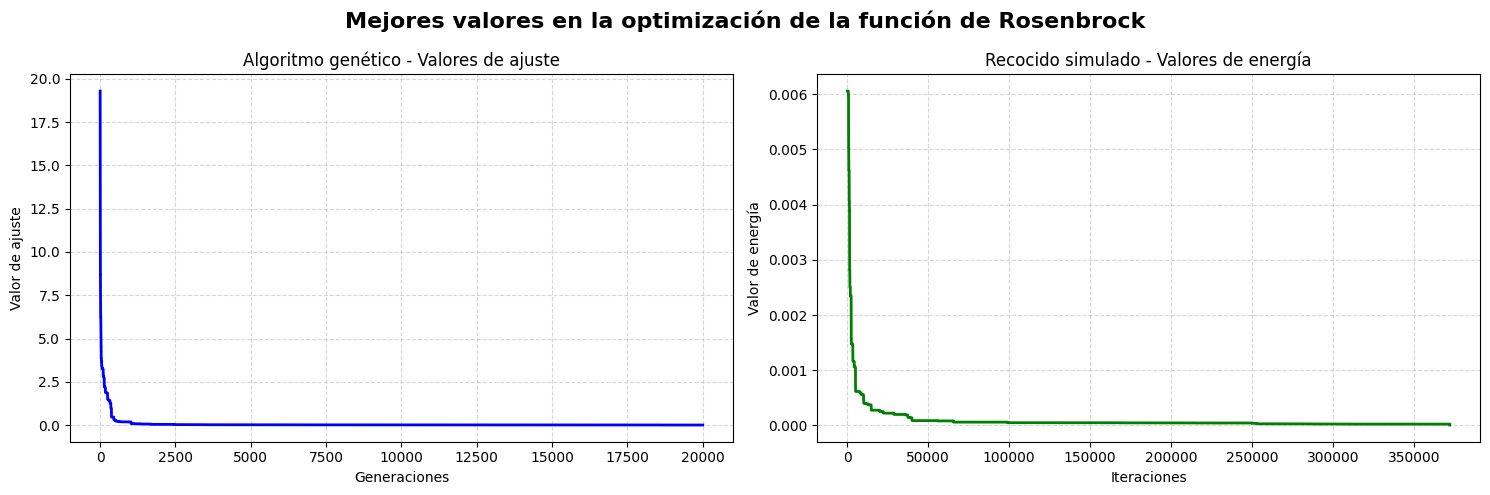

In [30]:
tempInicial = configuraciones[7][0]
ratioEnfriamiento = configuraciones[7][1]
tamPoblacion = configuraciones[7][2]

print(f'Parametros de la configuración {8}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 9

Parametros de la configuración 9: 
Tamaño de población: 100 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 9 se encontró el valor 0.004848479820303897
El valor de la media de los mejores valores con esta configuración fue 0.00845347629995965 con una desviación estandar de 0.002547101704109281
Búsqueda local (Recocido Simulado)
En la iteración 5 se encontró el valor 6.055205052479806e-06
El valor de la media de los mejores valores con esta configuración fue 8.739953037295578e-06 con una desviación estandar de 1.3460010992458771e-06
En la iteración 2 fue la que necesito menos iteraciones con un número de 189080 para encontrar el valor 9.362976794324851e-06
La media de iteraciones para el recocido simulado es de 491747.7 con una desviación estándar de 232215.407698994


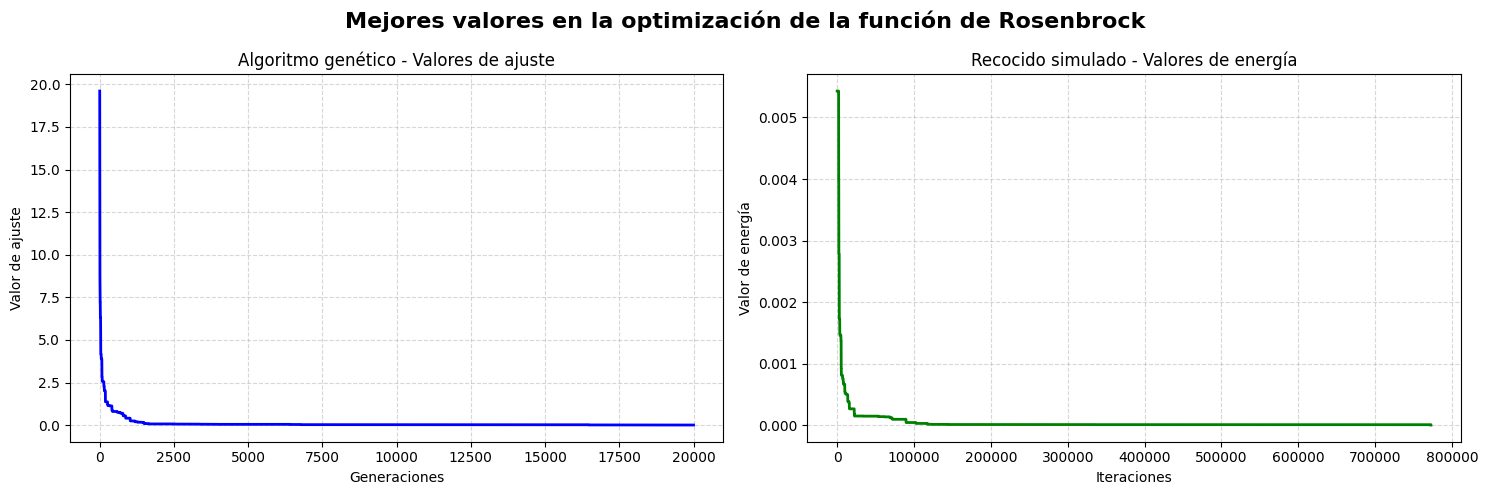

In [31]:
tempInicial = configuraciones[8][0]
ratioEnfriamiento = configuraciones[8][1]
tamPoblacion = configuraciones[8][2]

print(f'Parametros de la configuración {9}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 10

Parametros de la configuración 10: 
Tamaño de población: 150 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.85
Algoritmo génetico
En la iteración 4 se encontró el valor 0.003469641511874233
El valor de la media de los mejores valores con esta configuración fue 0.005680115437666178 con una desviación estandar de 0.0015743743906080035
Búsqueda local (Recocido Simulado)
En la iteración 4 se encontró el valor 6.865531642308298e-06
El valor de la media de los mejores valores con esta configuración fue 8.924973326163155e-06 con una desviación estandar de 8.129248448079018e-07
En la iteración 5 fue la que necesito menos iteraciones con un número de 310402 para encontrar el valor 9.473044216168347e-06
La media de iteraciones para el recocido simulado es de 539153.0 con una desviación estándar de 196586.6065966855


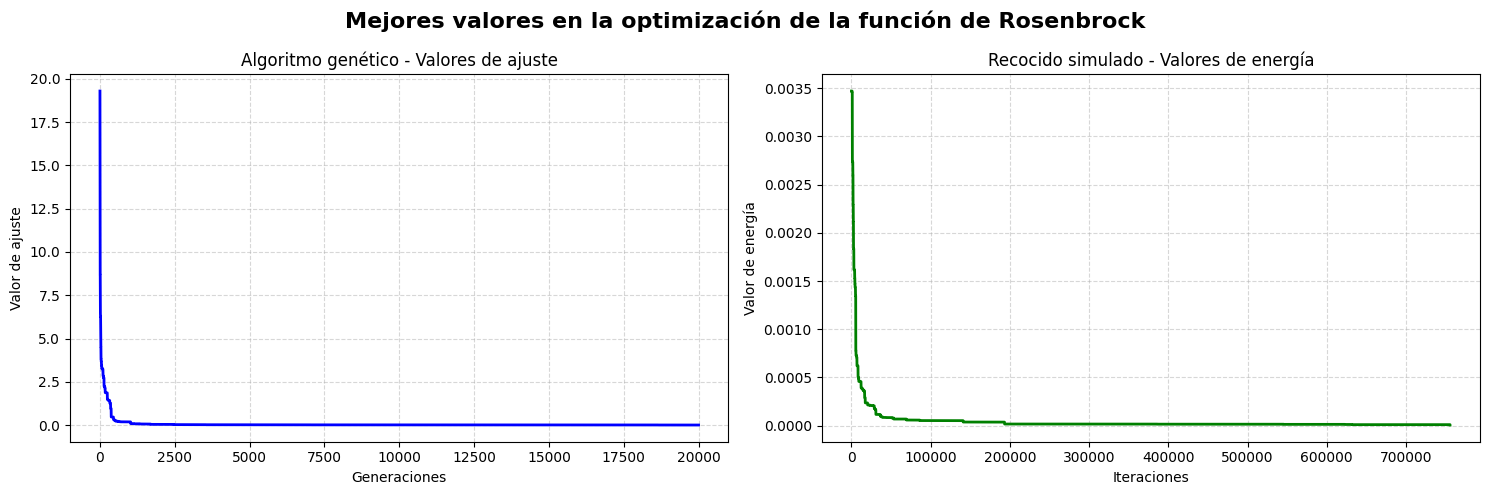

In [32]:
tempInicial = configuraciones[9][0]
ratioEnfriamiento = configuraciones[9][1]
tamPoblacion = configuraciones[9][2]

print(f'Parametros de la configuración {10}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 11

Parametros de la configuración 11: 
Tamaño de población: 100 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 9 se encontró el valor 0.004848479820303897
El valor de la media de los mejores valores con esta configuración fue 0.00845347629995965 con una desviación estandar de 0.002547101704109281
Búsqueda local (Recocido Simulado)
En la iteración 8 se encontró el valor 5.800439379033406e-06
El valor de la media de los mejores valores con esta configuración fue 9.100144650364684e-06 con una desviación estandar de 1.1734763779474462e-06
En la iteración 7 fue la que necesito menos iteraciones con un número de 291273 para encontrar el valor 9.779679100763161e-06
La media de iteraciones para el recocido simulado es de 494251.4 con una desviación estándar de 151100.49468694668


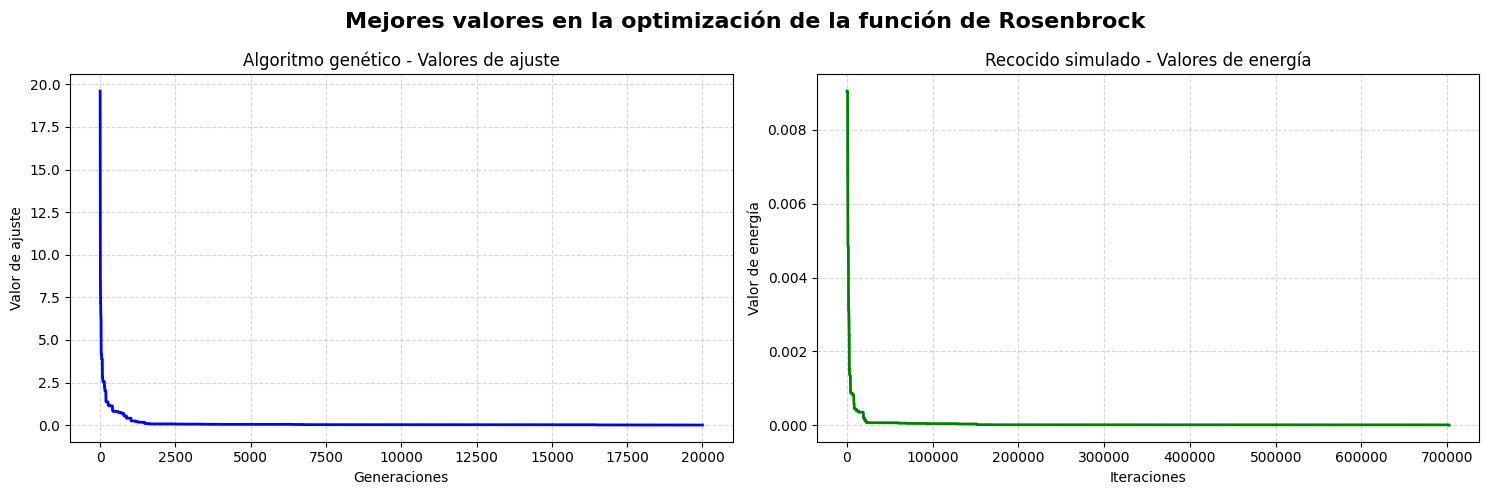

In [33]:
tempInicial = configuraciones[10][0]
ratioEnfriamiento = configuraciones[10][1]
tamPoblacion = configuraciones[10][2]

print(f'Parametros de la configuración {11}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")

Configuración 12

Parametros de la configuración 12: 
Tamaño de población: 150 || Temperatura Inicial: 140 || Ratio de enfriamiento: 0.95
Algoritmo génetico
En la iteración 4 se encontró el valor 0.003469641511874233
El valor de la media de los mejores valores con esta configuración fue 0.005680115437666178 con una desviación estandar de 0.0015743743906080035
Búsqueda local (Recocido Simulado)
En la iteración 9 se encontró el valor 5.3307489698006805e-06
El valor de la media de los mejores valores con esta configuración fue 8.681364144980109e-06 con una desviación estandar de 1.1614491615339354e-06
En la iteración 6 fue la que necesito menos iteraciones con un número de 283139 para encontrar el valor 8.858137217959694e-06
La media de iteraciones para el recocido simulado es de 438274.1 con una desviación estándar de 147585.82732054594


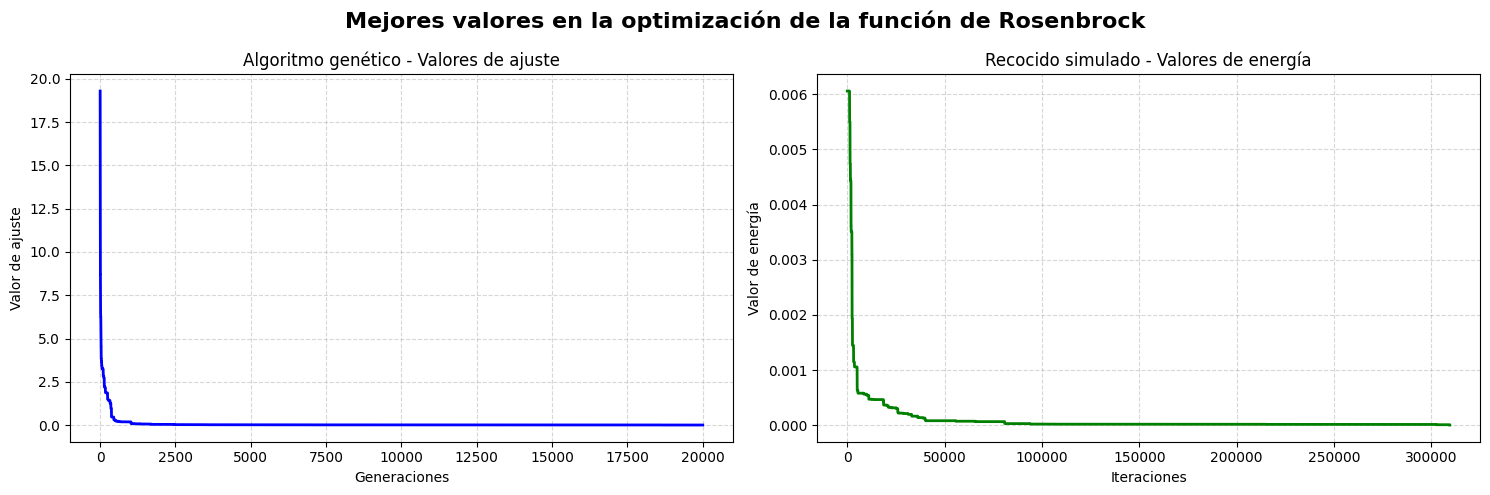

In [34]:
tempInicial = configuraciones[11][0]
ratioEnfriamiento = configuraciones[11][1]
tamPoblacion = configuraciones[11][2]

print(f'Parametros de la configuración {12}: \nTamaño de población: {tamPoblacion} || Temperatura Inicial: {tempInicial} || Ratio de enfriamiento: {ratioEnfriamiento}')
algoritmoHibrido(tamPoblacion, tempInicial, ratioEnfriamiento, fun_rosenbrock, "Rosenbrock")